In [2]:
import twstock
import pandas as pd
import numpy as np
import urllib.request
import time
import csv
#import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl,volume_overlay
import talib
from math import log, exp
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.dates import MonthLocator,MONTHLY
import datetime as dt
import pylab
import h5py
import math
import os
%matplotlib inline

In [3]:
stocknum = {'0051','1102','1216','1227','1314','1319','1434','1451','1476','1477','1504','1536','1560','1590',
            '1605','1704','1717','1718','1722','1723','1789','1802','1909','2015','2049','2059','2106','2201',
            '2204','2207','2227','2231','2312','2313','2324','2327','2337','2344','2347','2352','2353','2356',
            '2360','2371','2376','2377','2379','2385','2439','2448','2449','2451','2478','2492','2498','2542',
            '2603','2606','2610','2615','2618','2723','2809','2812','2834','2845','2867','2888','2912','2915',
            '3019','3034','3044','3051','3189','3231','3406','3443','3532','3673','3682','3702','3706','4137',
            '4915','4943','4958','5264','5522','5871','6005','6116','6176','6239','6269','6285','6409','6414',
            '6415','6452','6456','8454','8464','9910','9914','9917','9921','9933','9938','9941','9945'}

In [4]:
Y_slicing = 1
X_window = 50
K_changedays = 50

In [6]:
##############################       將變化量新建h5  
import math

for stockid in stocknum:
    df = pd.read_hdf(stockid+'.h5','stock_data')
    recordchangedata_np_ar = np.zeros((len(df)- X_window + 1 - K_changedays,2))
    
    for Y in range(int((len(df)- X_window)/ Y_slicing + 1 - K_changedays)):
        
        sumchange_plus = 0
        sumchange_minus = 0
        
        for i,K in enumerate(df.iloc[Y+K_changedays:Y+100,6]):  
            
            if  K- df.iloc[Y+K_changedays-1,6] > 0:
                sumchange_plus += K- df.iloc[Y+K_changedays-1,6]
            if  K- df.iloc[Y+K_changedays-1,6] < 0:
                sumchange_minus += abs(K- df.iloc[Y+K_changedays-1,6])
        
        recordchangedata_np_ar[Y][0] = sumchange_plus
        recordchangedata_np_ar[Y][1] = sumchange_minus
        
    se_rcd = pd.DataFrame(recordchangedata_np_ar,columns=['plus','minus'])
    se_rcd.to_hdf(stockid+'_table.h5','stock_data_table',format='table',mode='w')
        

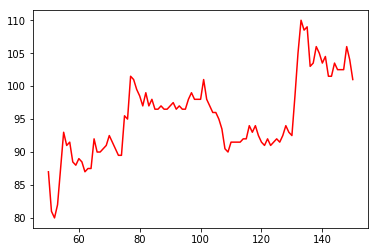

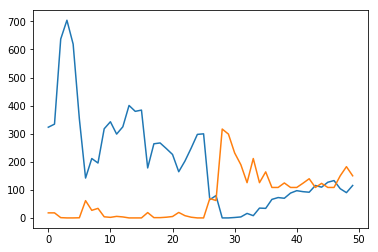

In [7]:
######################################         觀察變化量與價格關係
df_table = pd.read_hdf('2912_table.h5','stock_data_table')
df = pd.read_hdf('2912.h5','stock_data')

fig = plt.figure()

plt.plot(df.loc[50:150,'收盤價'],'r')
plt.show()
plt.plot(df_table[0:50])
plt.show()

In [8]:
########################################       求證總數無誤  將所有變化量統合
countZ=0
sum_df=pd.DataFrame()

for stockid in stocknum:
    df_table = pd.read_hdf(stockid+'_table.h5','stock_data_table')
    countZ += len(df_table)
    sum_df = pd.concat([sum_df,df_table],ignore_index=True)
    

print(countZ)
#print(sum_df)      ####################            OKOKOKOKOK
        
print(sum_df.describe())

456395
                plus          minus
count  456395.000000  456395.000000
mean      135.058281     126.684738
std       361.031032     364.638909
min         0.000000       0.000000
25%         3.000000       2.500000
50%        27.900000      25.500000
75%       117.150000     108.850000
max      9305.000000   11959.000000


In [9]:
##########################################   將分類套用並存h5   依變化量
for stockid in stocknum:
    df_table = pd.read_hdf(stockid+'_table.h5','stock_data_table',mode='r')
    table_sumchange = np.zeros((len(df_table),3))
    
    for i,value in enumerate(df_table.values)  :
        if value[0] >70 and value[1]<=70:
            table_sumchange[i][0]=1
        if value[0] <=70 and value[1]>70:
            table_sumchange[i][1]=1
        if (value[0] <70 and value[1]<70) or (value[0] >70 and value[1]>70):
            table_sumchange[i][2]=1
    print(table_sumchange.shape)
    table_sumchange_df = pd.DataFrame(table_sumchange,columns=['plus','minus','unchange'])
    table_sumchange_df.to_hdf(stockid+'_table_sumchange.h5','stock_data_table',format='table',mode='w')
            

(2011, 3)
(3440, 3)
(6425, 3)
(2881, 3)
(5286, 3)
(6638, 3)
(1190, 3)
(1656, 3)
(4131, 3)
(4755, 3)
(5019, 3)
(3938, 3)
(3938, 3)
(1656, 3)
(531, 3)
(2261, 3)
(6638, 3)
(6638, 3)
(6638, 3)
(4554, 3)
(6638, 3)
(3708, 3)
(5166, 3)
(4693, 3)
(4042, 3)
(1445, 3)
(4196, 3)
(3925, 3)
(5975, 3)
(6638, 3)
(6638, 3)
(3182, 3)
(3714, 3)
(2538, 3)
(6602, 3)
(3916, 3)
(3151, 3)
(6638, 3)
(3698, 3)
(2480, 3)
(4028, 3)
(3930, 3)
(6526, 3)
(6638, 3)
(399, 3)
(4905, 3)
(2910, 3)
(6615, 3)
(5781, 3)
(6638, 3)
(3708, 3)
(585, 3)
(6606, 3)
(3651, 3)
(3708, 3)
(828, 3)
(960, 3)
(1641, 3)
(1384, 3)
(4647, 3)
(3128, 3)
(5795, 3)
(5245, 3)
(4720, 3)
(6606, 3)
(4032, 3)
(4659, 3)
(3464, 3)
(6310, 3)
(5993, 3)
(6638, 3)
(5704, 3)
(1112, 3)
(897, 3)
(5327, 3)
(6638, 3)
(6302, 3)
(908, 3)
(4102, 3)
(1672, 3)
(3099, 3)
(2665, 3)
(4690, 3)
(5551, 3)
(3159, 3)
(4672, 3)
(6638, 3)
(6638, 3)
(4862, 3)
(4016, 3)
(645, 3)
(3605, 3)
(6084, 3)
(6084, 3)
(2881, 3)
(3839, 3)
(5389, 3)
(987, 3)
(2709, 3)
(6638, 3)
(5487, 3)

In [10]:
########################################       求證總數無誤  將所有變化量統合
countZ=0
sum_df=pd.DataFrame()

for stockid in stocknum:
    df_table = pd.read_hdf(stockid+'_table_sumchange.h5','stock_data_table')
    countZ += len(df_table)
    sum_df = pd.concat([sum_df,df_table],ignore_index=True)
    

print(countZ)
#print(sum_df)      ####################            OKOKOKOKOK
        
print(sum_df.describe())

456395
                plus          minus       unchange
count  456395.000000  456395.000000  456395.000000
mean        0.296445       0.282950       0.420467
std         0.456690       0.450433       0.493635
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         0.000000       0.000000       0.000000
75%         1.000000       1.000000       1.000000
max         1.000000       1.000000       1.000000
